In [2]:
pip install seaborn

     -------------------------------------- 294.6/294.6 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importando as bibliotecas

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Definindo as URL - Diretório dos arquivos csv a utilizar

In [2]:
URL_ARQUIVO = "./bancodados/202012.csv"
URL_ARQUIVO_HISTORICO = "./bancodados/HISTORICO_PLANOS.csv"
URL_ARQUIVO_GEOGRAFICO = "./bancodados/geografia.csv"

Abrindo o arquivo '202012.csv' com os dados de venda do plano de Saúde

E exibindo a tabela com todos os dados existentes, alterando o tipo da variável VCM para numérica

In [3]:
#tabela_vendas = pd.read_csv(URL_ARQUIVO, delimiter=';', skiprows=lambda x: x > 0 and random.random() >= 0.05)
tabela_vendas = pd.read_csv(URL_ARQUIVO, delimiter=';')
tabela_vendas['VCM'] = tabela_vendas['VCM'].str.replace(',', '.').astype(float)

#tabela_vendas

In [26]:
tabela_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56243460 entries, 0 to 56243459
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CD_MUNICIPIO     int64  
 1   ID_PLANO         int64  
 2   CD_FAIXA_ETARIA  int64  
 3   VCM              float64
dtypes: float64(1), int64(3)
memory usage: 1.7 GB


Abrindo o banco de dados geográficos

In [4]:
tabela_geografica = pd.read_csv(URL_ARQUIVO_GEOGRAFICO, sep=";")

tabela_geografica_simplificada = tabela_geografica[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF', 'NM_REGIAO']]

tabela_geografica_simplificada


,CD_MUNICIPIO,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,330360,Paracambi,RJ,Sudeste
1,330370,Paraíba do Sul,RJ,Sudeste
2,330380,Paraty,RJ,Sudeste
3,315210,Ponte Nova,MG,Sudeste
4,315213,Ponto Chique,MG,Sudeste
...,...,...,...,...
5565,421265,Pescaria Brava,SC,Sul
5566,150475,Mojuí dos Campos,PA,Norte
5567,422000,Balneário Rincão,SC,Sul
5568,431454,Pinto Bandeira,RS,Sul


In [5]:
tabela_merge = pd.merge(tabela_vendas, tabela_geografica_simplificada, how='inner', on='CD_MUNICIPIO')

tabela_merge

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte
1,110001,1328693,2,194.08,Alta Floresta D'Oeste,RO,Norte
2,110001,1328693,3,234.83,Alta Floresta D'Oeste,RO,Norte
3,110001,1328693,4,281.79,Alta Floresta D'Oeste,RO,Norte
4,110001,1328693,5,321.25,Alta Floresta D'Oeste,RO,Norte
...,...,...,...,...,...,...,...
56243455,530010,18337397,6,397.40,Brasília,DF,Centro-Oeste
56243456,530010,18337397,7,477.93,Brasília,DF,Centro-Oeste
56243457,530010,18337397,8,555.80,Brasília,DF,Centro-Oeste
56243458,530010,18337397,9,610.27,Brasília,DF,Centro-Oeste


In [71]:
tabela_historico = pd.read_csv(URL_ARQUIVO_HISTORICO, sep=",", low_memory=False)

tabela_historico_simplificado = tabela_historico[['ID_PLANO', 'DT_FIM_STATUS','DE_SITUACAO_PRINCIPAL']]

#describe(include=object)

tabela_historico_simplificado.head()

,ID_PLANO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,1324729,11/10/2006,ATIVO
1,1324729,NaN,CANCELADO
2,1324732,11/10/2006,ATIVO
3,1324732,NaN,CANCELADO
4,1324735,11/10/2006,ATIVO


In [46]:
tabela_historico_simplificado.isnull().sum()

#Planos sem informações totais - não constam no dataset base
#1513693
#1513694
#1513695

#DT_FIM_STATUS 
#vazio: cancelado (3) ou ativo (1)

ID_PLANO                      0
DT_FIM_STATUS            150287
DE_SITUACAO_PRINCIPAL         3
dtype: int64

In [53]:
tabela_1513693 = tabela_merge.loc[tabela_merge['ID_PLANO'] == 1513693]
print(tabela_1513693.info())
tabela_1513694 = tabela_merge.loc[tabela_merge['ID_PLANO'] == 1513694]
print(tabela_1513694.info())
tabela_1513695 = tabela_merge.loc[tabela_merge['ID_PLANO'] == 1513695]
print(tabela_1513695.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CD_MUNICIPIO     0 non-null      int64  
 1   ID_PLANO         0 non-null      int64  
 2   CD_FAIXA_ETARIA  0 non-null      int64  
 3   VCM              0 non-null      float64
 4   NM_MUNICIPIO     0 non-null      object 
 5   SG_UF            0 non-null      object 
 6   NM_REGIAO        0 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 0.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CD_MUNICIPIO     0 non-null      int64  
 1   ID_PLANO         0 non-null      int64  
 2   CD_FAIXA_ETARIA  0 non-null      int64  
 3   VCM              0 non-null      float64
 4   NM_MUNICIPIO     0 non-null      object 
 5   SG_UF

In [57]:
tabela_historico_simplificado.loc[tabela_historico_simplificado['ID_PLANO'] == 1513693] #162516

tabela_historico_simplificado.loc[tabela_historico_simplificado['ID_PLANO'] == 1513694] #162517

tabela_historico_simplificado.loc[tabela_historico_simplificado['ID_PLANO'] == 1513695] #162518

#nao sera preciso deletar do dataset base pq nao há esse plano - nem do historico pq o status = 2 (na proxima analise é cancelado)
#caso estivesse, usaria o drop pelo index

,ID_PLANO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
162518,1513695,2,NaN


In [79]:
#filtrar os status NaN
ativo = tabela_historico_simplificado.DT_FIM_STATUS.isna()
ativo
historico = tabela_historico_simplificado[ativo]
historico
print(historico.DE_SITUACAO_PRINCIPAL.value_counts())

CANCELADO                             58926
ATIVO COM COMERCIALIZA��O SUSPENSA    41836
ATIVO                                 25058
TRANSFERIDO                           24467
Name: DE_SITUACAO_PRINCIPAL, dtype: int64


In [81]:
#planos ativos total
planos_ativos = historico.loc[historico['DE_SITUACAO_PRINCIPAL'] == 'ATIVO']

planos_ativos
print(planos_ativos.DE_SITUACAO_PRINCIPAL.value_counts())
#dos 150287 planos, 25058 estão ativos - 125229 cancelados

ATIVO    25058
Name: DE_SITUACAO_PRINCIPAL, dtype: int64


In [83]:
#merge dos planos ativos
tabela_ativo = pd.merge(tabela_merge, planos_ativos, how='left', on='ID_PLANO')
tabela_ativo


,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
1,110001,1328693,2,194.08,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
2,110001,1328693,3,234.83,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
3,110001,1328693,4,281.79,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
4,110001,1328693,5,321.25,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
...,...,...,...,...,...,...,...,...,...
56243455,530010,18337397,6,397.40,Brasília,DF,Centro-Oeste,NaN,NaN
56243456,530010,18337397,7,477.93,Brasília,DF,Centro-Oeste,NaN,NaN
56243457,530010,18337397,8,555.80,Brasília,DF,Centro-Oeste,NaN,NaN
56243458,530010,18337397,9,610.27,Brasília,DF,Centro-Oeste,NaN,NaN


In [77]:
#apenas para verificação
#tabela_total = pd.merge(tabela_merge, historico, how='left', on='ID_PLANO')
#tabela_total

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
1,110001,1328693,2,194.08,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
2,110001,1328693,3,234.83,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
3,110001,1328693,4,281.79,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
4,110001,1328693,5,321.25,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
...,...,...,...,...,...,...,...,...,...
56243455,530010,18337397,6,397.40,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
56243456,530010,18337397,7,477.93,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
56243457,530010,18337397,8,555.80,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
56243458,530010,18337397,9,610.27,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA


In [84]:
planos_ativos_2020 = tabela_ativo.loc[tabela_ativo['DE_SITUACAO_PRINCIPAL'] == 'ATIVO']

planos_ativos_2020
#print(planos_ativos_2020.DE_SITUACAO_PRINCIPAL.value_counts())

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
1,110001,1328693,2,194.08,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
2,110001,1328693,3,234.83,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
3,110001,1328693,4,281.79,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
4,110001,1328693,5,321.25,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
...,...,...,...,...,...,...,...,...,...
56243415,530010,18335344,6,967.29,Brasília,DF,Centro-Oeste,NaN,ATIVO
56243416,530010,18335344,7,1132.36,Brasília,DF,Centro-Oeste,NaN,ATIVO
56243417,530010,18335344,8,1362.65,Brasília,DF,Centro-Oeste,NaN,ATIVO
56243418,530010,18335344,9,1765.66,Brasília,DF,Centro-Oeste,NaN,ATIVO


In [85]:
planos_1 = planos_ativos_2020.loc[planos_ativos_2020['CD_FAIXA_ETARIA'] == 1]
planos_1

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
10,110001,1329163,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
20,110001,1329193,1,746.44,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
30,110001,1329198,1,703.16,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
40,110001,1329553,1,282.34,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
...,...,...,...,...,...,...,...,...,...
56243370,530010,18324333,1,405.75,Brasília,DF,Centro-Oeste,NaN,ATIVO
56243380,530010,18327522,1,324.30,Brasília,DF,Centro-Oeste,NaN,ATIVO
56243390,530010,18327532,1,324.30,Brasília,DF,Centro-Oeste,NaN,ATIVO
56243400,530010,18329314,1,288.38,Brasília,DF,Centro-Oeste,NaN,ATIVO


Sudeste         1521598
Nordeste        1263314
Sul              911011
Centro-Oeste     313855
Norte            284817
Name: NM_REGIAO, dtype: int64


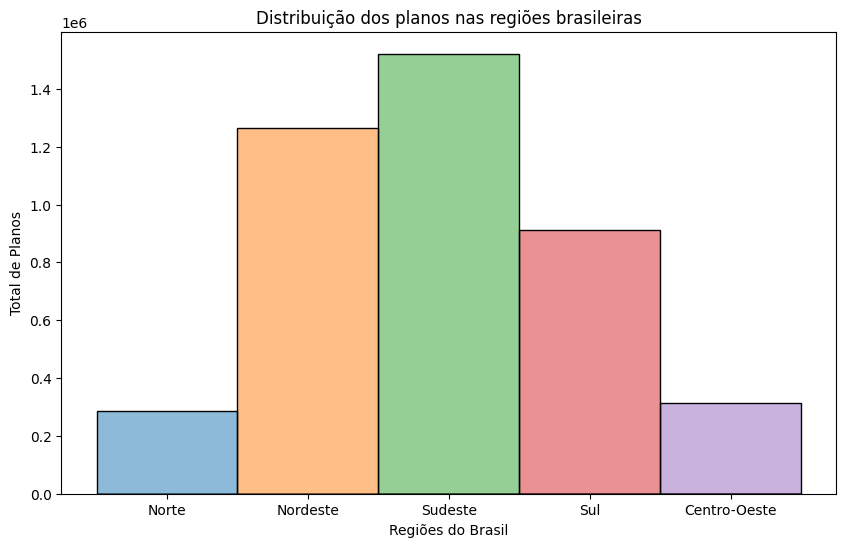

In [112]:
#Analise das regiões
print(planos_1['NM_REGIAO'].value_counts())
plt.figure(figsize=(10, 6))
sns.histplot(data=planos_1, x='NM_REGIAO', hue="NM_REGIAO", legend=False, bins=30)
plt.title('Distribuição dos planos nas regiões brasileiras')
plt.xlabel('Regiões do Brasil')
plt.ylabel('Total de Planos')
plt.show()

In [110]:
#Analisar o preço geral
print(planos_ativos_2020.isnull().sum())
print(planos_ativos_2020['VCM'].isnull().sum())
print(planos_ativos_2020['VCM'].describe())

#desvio padrão alto para os preços - variação ns faixas etarias - por isso, analisar por faixa etaria

CD_MUNICIPIO                    0
ID_PLANO                        0
CD_FAIXA_ETARIA                 0
VCM                             0
NM_MUNICIPIO                    0
SG_UF                           0
NM_REGIAO                       0
DT_FIM_STATUS            42945950
DE_SITUACAO_PRINCIPAL           0
dtype: int64
0
count    4.294595e+07
mean     9.722097e+02
std      1.024792e+03
min      1.700000e+01
25%      3.910800e+02
50%      6.548500e+02
75%      1.176000e+03
max      2.995036e+04
Name: VCM, dtype: float64


In [104]:
#Analisando os preços das faixas etarias
plt.figure(figsize=(10, 6))
for i in range (1,11):
    tabela = planos_ativos_2020[planos_ativos_2020['CD_FAIXA_ETARIA'] == i]
    print('Faixa etaria', i)
    print(tabela['VCM'].describe())
    

Faixa etaria 1
count    4.294595e+06
mean     3.989341e+02
std      2.974153e+02
min      1.700000e+01
25%      2.195600e+02
50%      3.015000e+02
75%      4.658900e+02
max      5.000000e+03
Name: VCM, dtype: float64
Faixa etaria 2
count    4.294595e+06
mean     4.940662e+02
std      3.816561e+02
min      1.953000e+01
25%      2.716300e+02
50%      3.690300e+02
75%      5.687500e+02
max      9.230350e+03
Name: VCM, dtype: float64
Faixa etaria 3
count    4.294595e+06
mean     5.785972e+02
std      4.347472e+02
min      2.150000e+01
25%      3.216400e+02
50%      4.337600e+02
75%      6.775900e+02
max      1.071279e+04
Name: VCM, dtype: float64
Faixa etaria 4
count    4.294595e+06
mean     6.493968e+02
std      4.863870e+02
min      2.257000e+01
25%      3.652900e+02
50%      4.844100e+02
75%      7.628900e+02
max      1.126557e+04
Name: VCM, dtype: float64
Faixa etaria 5
count    4.294595e+06
mean     7.095753e+02
std      5.243961e+02
min      2.597000e+01
25%      4.039200e+02
50%    

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.relplot(
    data=planos_ativos_2020,
    x="CD_FAIXA_ETARIA", y="VCM",
    col="SG_UF", 
    height=3, aspect=.75, linewidth=2.5,
)

SP    735228
MG    629399
RS    397425
PR    305619
BA    297897
SC    207967
GO    172575
PB    159550
MA    150688
PI    143681
PE    139146
CE    135855
RN    115853
RJ    101478
PA    100748
MT     89402
TO     77404
AL     72477
ES     55493
MS     50988
SE     48167
AM     42708
RO     33249
AC     12279
AP     10077
RR      8352
DF       890
Name: SG_UF, dtype: int64


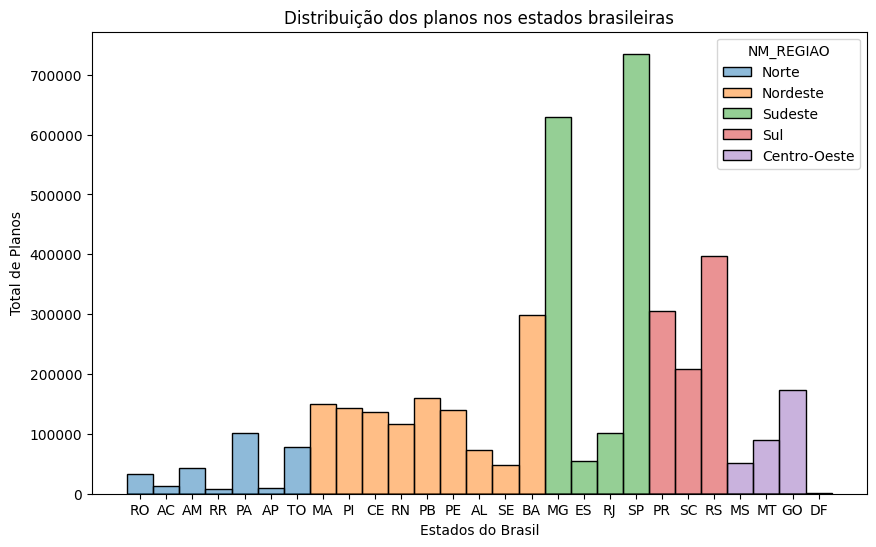

In [111]:
#Analise dos estados
faixa_1 = planos_ativos_2020[planos_ativos_2020['CD_FAIXA_ETARIA'] == 1]
print(faixa_1['SG_UF'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(data=planos_1, x='SG_UF', hue="NM_REGIAO", legend=True, bins=30)
plt.title('Distribuição dos planos nos estados brasileiras')
plt.xlabel('Estados do Brasil')
plt.ylabel('Total de Planos')
plt.show()


In [113]:
print(faixa_1['NM_MUNICIPIO'].value_counts())

Bom Jesus        3542
São Domingos     3457
Planalto         3386
Vera Cruz        3361
São Francisco    3195
                 ... 
Xambioá           530
Wanderlândia      529
Tupiratins        528
Tocantínia        527
Tupirama          526
Name: NM_MUNICIPIO, Length: 5297, dtype: int64


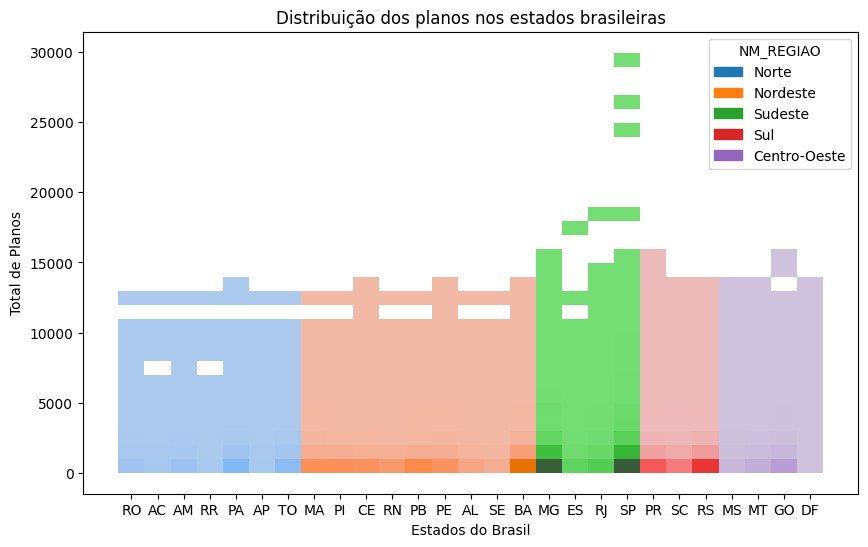

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(data=planos_ativos_2020, x='SG_UF', y = 'VCM', hue="NM_REGIAO", legend=True, bins=30)
plt.title('Distribuição dos planos nos estados brasileiras')
plt.xlabel('Estados do Brasil')
plt.ylabel('Total de Planos')
plt.show()


In [32]:
DATA_BASE = 2021

#tabela_merge_historico = pd.merge(tabela_merge, tabela_historico_simplificado, how='left', on='ID_PLANO')

#tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DT_FIM_STATUS'].str.slice(6).astype(int) < DATA_BASE]

#tabela_merge_historico['VCM'] = tabela_merge_historico['VCM'].str.replace(',', '.').astype(float)

#tabela_merge_historico
tabela_merge_historico = pd.merge(tabela, tabela_historico_simplificado, how='left', on='ID_PLANO')
#tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DT_FIM_STATUS'].str.slice(6).astype(int) < DATA_BASE]
tabela_merge_historico

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,110001,1328693,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
1,110001,1329163,1,164.47,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
2,110001,1329193,1,746.44,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
3,110001,1329198,1,703.16,Alta Floresta D'Oeste,RO,Norte,NaN,ATIVO
4,110001,1329553,1,282.34,Alta Floresta D'Oeste,RO,Norte,11/08/2014,ATIVO
...,...,...,...,...,...,...,...,...,...
12209142,530010,18337375,1,149.88,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
12209143,530010,18337386,1,243.58,Brasília,DF,Centro-Oeste,19/01/2023,ATIVO
12209144,530010,18337386,1,243.58,Brasília,DF,Centro-Oeste,NaN,ATIVO COM COMERCIALIZA��O SUSPENSA
12209145,530010,18337397,1,194.86,Brasília,DF,Centro-Oeste,19/01/2023,ATIVO


In [20]:
resultado = tabela['ID_PLANO'].value_counts()
planos = tabela['ID_PLANO']
planos
#list(resultado)

0            1328693
10           1329163
20           1329193
30           1329198
40           1329553
              ...   
56243410    18335344
56243420    18337364
56243430    18337375
56243440    18337386
56243450    18337397
Name: ID_PLANO, Length: 5624346, dtype: int64

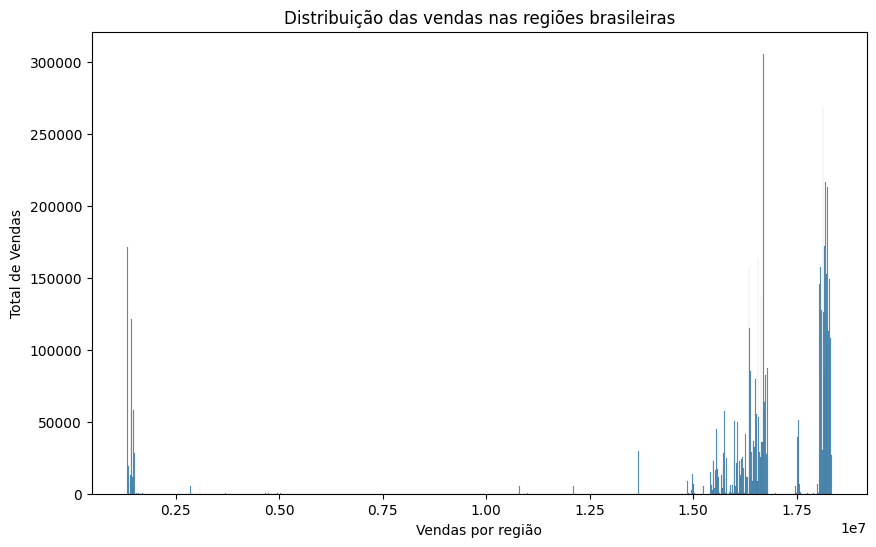

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tabela, x='ID_PLANO', legend=True, bins=1000)
plt.title('Distribuição das vendas nas regiões brasileiras')
plt.xlabel('Vendas por região')
plt.ylabel('Total de Vendas')
plt.show()

In [57]:
#teste
#tabela_teste = tabela_sul[tabela_sul['CD_MUNICIPIO'] == 410050]
#teste = tabela_teste['CD_FAIXA_ETARIA'].loc[tabela_teste['VCM'] == tabela_teste['VCM'].max()]
#print(tabela_teste['VCM'].max())
#teste

In [ ]:
tabela_sul = tabela_merge[tabela_merge['NM_REGIAO'] == 'Sul']

In [33]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].min())
    

20.0
24.03
31.6
35.06
38.0
44.84
47.89
49.0
49.0
63.0


In [58]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].max())

5090.01
6198.1
7762.51
8936.2
10579.56
11839.59
13628.55
16831.26
21379.07
30390.35


In [59]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].mean())

377.8486990649977
470.0372429665377
550.6954800432312
615.3672461083466
671.7751975736862
751.8268451800467
935.8224416712751
1153.1244790964995
1421.1608752492514
2225.029974547161


In [37]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela)

          CD_MUNICIPIO  ID_PLANO  CD_FAIXA_ETARIA     VCM NM_MUNICIPIO SG_UF  \
40178340        410010   1325224                1  257.92       Abatiá    PR   
40178350        410010   1328693                1  158.00       Abatiá    PR   
40178360        410010   1329163                1  158.00       Abatiá    PR   
40178370        410010   1329193                1  717.70       Abatiá    PR   
40178380        410010   1329198                1  676.07       Abatiá    PR   
...                ...       ...              ...     ...          ...   ...   
52114090        432380  18324333                1  405.75    Xangri-Lá    RS   
52114100        432380  18327522                1  324.30    Xangri-Lá    RS   
52114110        432380  18327532                1  324.30    Xangri-Lá    RS   
52114120        432380  18329314                1  288.38    Xangri-Lá    RS   
52114130        432380  18335344                1  435.63    Xangri-Lá    RS   

         NM_REGIAO  
40178340       Sul

          CD_MUNICIPIO  ID_PLANO  CD_FAIXA_ETARIA      VCM NM_MUNICIPIO SG_UF  \
40178349        410010   1325224               10  1547.50       Abatiá    PR   
40178359        410010   1328693               10   946.96       Abatiá    PR   
40178369        410010   1329163               10   946.96       Abatiá    PR   
40178379        410010   1329193               10  4306.05       Abatiá    PR   
40178389        410010   1329198               10  4056.33       Abatiá    PR   
...                ...       ...              ...      ...          ...   ...   
52114099        432380  18324333               10  2433.92    Xangri-Lá    RS   
52114109        432380  18327522               10  1945.64    Xangri-Lá    RS   
52114119        432380  18327532               10  1945.64    Xangri-Lá    RS   
52114129        432380  18329314               10  1729.87    Xangri-Lá    RS   
52114139        432380  18335344               10  2609.33    Xangri-Lá    RS   

         NM_REGIAO  
401783

In [40]:
for i in range (1,11):
    tabela = tabela_sul[tabela_sul['CD_FAIXA_ETARIA'] == i]
    print(tabela['VCM'].max())
    print(tabela['NM_MUNICIPIO'].loc[tabela['VCM'] == tabela['VCM'].max()])

5090.01
40239780                    Altônia
40260270               Alto Piquiri
40645000         Brasilândia do Sul
40675020             Cafezal do Sul
41098010          Cruzeiro do Oeste
41202070                  Douradina
41242300             Esperança Nova
41455180                    Goioerê
41625790                   Icaraíma
41715890                      Iporã
41846200                      Ivaté
41916830                 Janiópolis
42249620               Maria Helena
42290370                    Mariluz
42452050              Moreira Sales
42582290               Nova Olímpia
42826030                    Perobal
42836190                     Pérola
43090480          Quarto Centenário
43191050      Rancho Alegre D'Oeste
43689430    São Jorge do Patrocínio
43933300                     Tapira
44096420                   Umuarama
44175200               Alto Paraíso
44214400                     Xambrê
Name: NM_MUNICIPIO, dtype: object
6198.1
40239781                    Altônia
40260271       

30390.35
40239789                    Altônia
40260279               Alto Piquiri
40645009         Brasilândia do Sul
40675029             Cafezal do Sul
41098019          Cruzeiro do Oeste
41202079                  Douradina
41242309             Esperança Nova
41455189                    Goioerê
41625799                   Icaraíma
41715899                      Iporã
41846209                      Ivaté
41916839                 Janiópolis
42249629               Maria Helena
42290379                    Mariluz
42452059              Moreira Sales
42582299               Nova Olímpia
42826039                    Perobal
42836199                     Pérola
43090489          Quarto Centenário
43191059      Rancho Alegre D'Oeste
43689439    São Jorge do Patrocínio
43933309                     Tapira
44096429                   Umuarama
44175209               Alto Paraíso
44214409                     Xambrê
Name: NM_MUNICIPIO, dtype: object


In [31]:
tabela_sul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11935800 entries, 40178340 to 52114139
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CD_MUNICIPIO     int64  
 1   ID_PLANO         int64  
 2   CD_FAIXA_ETARIA  int64  
 3   VCM              float64
 4   NM_MUNICIPIO     object 
 5   SG_UF            object 
 6   NM_REGIAO        object 
dtypes: float64(1), int64(3), object(3)
memory usage: 728.5+ MB


In [32]:
tabela_sul.describe()

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM
count,1.193580e+07,1.193580e+07,1.193580e+07,1.193580e+07
mean,4.221197e+05,1.571008e+07,5.500000e+00,9.172688e+02
std,8.634928e+03,4.689712e+06,2.872281e+00,8.957554e+02
min,4.100100e+05,1.325224e+06,1.000000e+00,2.000000e+01
25%,4.121250e+05,1.634571e+07,3.000000e+00,3.866600e+02
50%,4.213500e+05,1.670135e+07,5.500000e+00,6.275700e+02
75%,4.310410e+05,1.816548e+07,8.000000e+00,1.142780e+03
max,4.323800e+05,1.834366e+07,1.000000e+01,3.039035e+04


In [13]:
tabela_sul['NM_MUNICIPIO'].value_counts()

Sarandi             21420
Colorado            21250
Barracão            20460
Cruzeiro do Sul     20440
Planalto            20260
                    ...  
Cordilheira Alta     9110
Pinto Bandeira       9010
Leoberto Leal        8970
Pescaria Brava       8170
Balneário Rincão     8060
Name: NM_MUNICIPIO, Length: 1178, dtype: int64

In [15]:
tabela_sudeste = tabela_merge[tabela_merge['NM_REGIAO'] == 'Sudeste']
tabela_sudeste

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
20322550,310010,1325224,1,"244,08",Abadia dos Dourados,MG,Sudeste
20322551,310010,1325224,2,"288,02",Abadia dos Dourados,MG,Sudeste
20322552,310010,1325224,3,"348,51",Abadia dos Dourados,MG,Sudeste
20322553,310010,1325224,4,"418,2",Abadia dos Dourados,MG,Sudeste
20322554,310010,1325224,5,"476,78",Abadia dos Dourados,MG,Sudeste
...,...,...,...,...,...,...,...
40178335,355730,18335344,6,"967,29",Estiva Gerbi,SP,Sudeste
40178336,355730,18335344,7,"1132,36",Estiva Gerbi,SP,Sudeste
40178337,355730,18335344,8,"1362,65",Estiva Gerbi,SP,Sudeste
40178338,355730,18335344,9,"1765,66",Estiva Gerbi,SP,Sudeste


In [16]:
tabela_sudeste['NM_MUNICIPIO'].value_counts()

Rio Claro               27730
Mesquita                26110
Itapeva                 23940
São Paulo               23930
Presidente Bernardes    23870
                        ...  
Dores do Rio Preto       9310
Itarana                  9280
Laranja da Terra         9270
Santa Leopoldina         9250
Itaguaçu                 9250
Name: NM_MUNICIPIO, Length: 1659, dtype: int64

In [19]:
tabela_norte = tabela_merge[tabela_merge['NM_REGIAO'] == 'Norte']
tabela_norte

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,110001,1328693,1,"164,47",Alta Floresta D'Oeste,RO,Norte
1,110001,1328693,2,"194,08",Alta Floresta D'Oeste,RO,Norte
2,110001,1328693,3,"234,83",Alta Floresta D'Oeste,RO,Norte
3,110001,1328693,4,"281,79",Alta Floresta D'Oeste,RO,Norte
4,110001,1328693,5,"321,25",Alta Floresta D'Oeste,RO,Norte
...,...,...,...,...,...,...,...
3729845,172210,18335344,6,"967,29",Xambioá,TO,Norte
3729846,172210,18335344,7,"1132,36",Xambioá,TO,Norte
3729847,172210,18335344,8,"1362,65",Xambioá,TO,Norte
3729848,172210,18335344,9,"1765,66",Xambioá,TO,Norte


In [20]:
tabela_norte['NM_MUNICIPIO'].value_counts()

Bom Jesus do Tocantins    16390
Pau D'Arco                16380
Belém                     11620
Manaus                    11380
Ananindeua                10710
                          ...  
Tocantinópolis             6990
Xambioá                    6980
Wanderlândia               6970
Tupiratins                 6960
Tupirama                   6940
Name: NM_MUNICIPIO, Length: 448, dtype: int64

In [21]:
tabela_nordeste = tabela_merge[tabela_merge['NM_REGIAO'] == 'Nordeste']
tabela_nordeste

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
3729850,210005,1325224,1,"393,04",Açailândia,MA,Nordeste
3729851,210005,1325224,2,"463,78",Açailândia,MA,Nordeste
3729852,210005,1325224,3,"561,18",Açailândia,MA,Nordeste
3729853,210005,1325224,4,"673,4",Açailândia,MA,Nordeste
3729854,210005,1325224,5,"767,67",Açailândia,MA,Nordeste
...,...,...,...,...,...,...,...
20322545,293360,18335344,6,"967,29",Xique-Xique,BA,Nordeste
20322546,293360,18335344,7,"1132,36",Xique-Xique,BA,Nordeste
20322547,293360,18335344,8,"1362,65",Xique-Xique,BA,Nordeste
20322548,293360,18335344,9,"1765,66",Xique-Xique,BA,Nordeste


In [22]:
tabela_nordeste['NM_MUNICIPIO'].value_counts()

Santa Cruz           28890
Santa Inês           28240
Santa Luzia          27710
Água Branca          26790
Bom Jesus            26740
                     ...  
Avelino Lopes         8320
Assunção do Piauí     8320
Arraial               8320
Aroeiras do Itaim     8290
Nazária               7360
Name: NM_MUNICIPIO, Length: 1726, dtype: int64

In [23]:
tabela_centro = tabela_merge[tabela_merge['NM_REGIAO'] == 'Centro-Oeste']
tabela_centro

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_MUNICIPIO,SG_UF,NM_REGIAO
52114140,500020,1325224,1,"221,24",Água Clara,MS,Centro-Oeste
52114141,500020,1325224,2,"261,07",Água Clara,MS,Centro-Oeste
52114142,500020,1325224,3,"315,89",Água Clara,MS,Centro-Oeste
52114143,500020,1325224,4,"379,08",Água Clara,MS,Centro-Oeste
52114144,500020,1325224,5,"432,13",Água Clara,MS,Centro-Oeste
...,...,...,...,...,...,...,...
56243455,530010,18337397,6,"397,4",Brasília,DF,Centro-Oeste
56243456,530010,18337397,7,"477,93",Brasília,DF,Centro-Oeste
56243457,530010,18337397,8,"555,8",Brasília,DF,Centro-Oeste
56243458,530010,18337397,9,"610,27",Brasília,DF,Centro-Oeste


Filtrar apenas planos ativos

Abrindo o banco de dados gerografico, utilizado para indicar o 'CD_MUNICIPIO' na tabela de vendas

Realizando a junção dos dois bancos de dados através do 'CD_MUNICIPIO'

*Descrisão da tabela*


Visualizando os dados da tabela - A distribuição dos planos vendidos

Visualizando os dados da tabela - A distribuição dos valores de mensalidade

Visualizando os dados da tabela - A distribuição das faixa de idade

Visualizando os dados da tabela - A distribuição das vendas pelas regiões do Brasil

Visualizando os dados da tabela - A distribuição das vendas pelos estados brasileiros

Visualizando os dados da tabela - A distribuição das Tipo do plano x Valores da mensalidade

Visualizando os dados da tabela - A distribuição das Faixa etária x Tipo do plano

Visualizando os dados da tabela - A distribuição das Tipo do plano x Regiões brasileiras e Estados brasileiros

Visualizando os dados da tabela - A distribuição das Faixa etária x Valores da mensalidade

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Regiões brasileiras

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Estados barasileiro

Visualizando os dados da tabela - A distribuição das Faixa Etária x Regiões brasileiras e Estados brasileiros